<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [196]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [197]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# TAREA 

<div class="alert alert-success">
    
**Ejercicio 1**
    
 <ul>     
  <li>a) Generar imagenes como las que se muestran a continuación (300 x 300)</li>
  <li>b) Aplicar las operaciones de AND, OR y XOR</li>
   <li>b)Aplicar la operación inversa a ambas imagenes</li>     
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/circulo_triangulo.png">


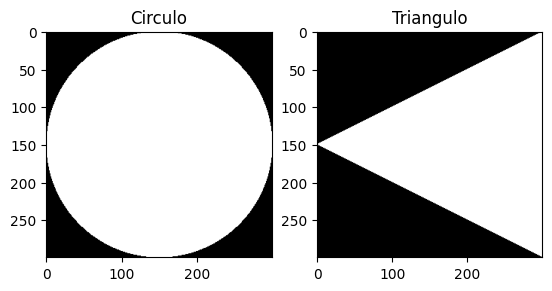

In [198]:
circle = np.zeros((300, 300), dtype="uint8")
cv.circle(circle, (150, 150), 150, 255, -1)

triangle = np.zeros((300, 300), dtype="uint8")
pts = np.array([[0, 150], [300, 300], [300, 0]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv.fillPoly(triangle, [pts], 255)

fig = plt.figure()

ax1 = fig.add_subplot(122)
ax1.imshow(triangle, cmap='gray')
ax1.set_title('Triangulo')

ax2 = fig.add_subplot(121)
ax2.imshow(circle, cmap='gray')
ax2.set_title('Circulo')

plt.show()

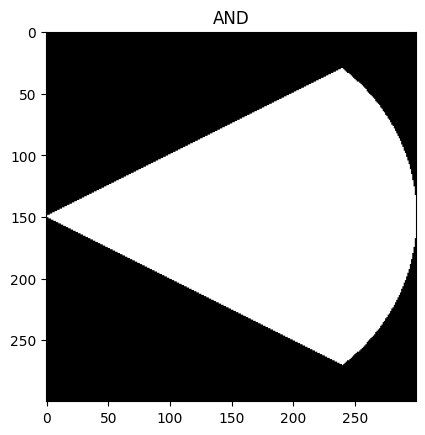

In [199]:
#AND
img_and = cv.bitwise_and(circle, triangle)
plt_imshow("AND", img_and)

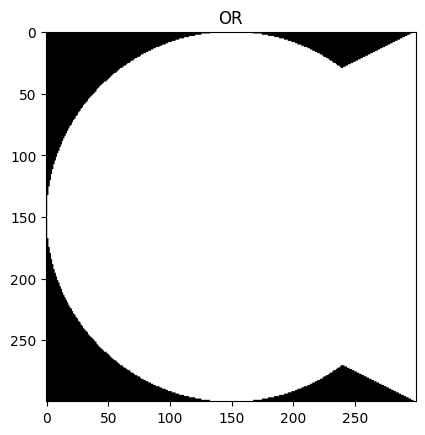

In [200]:
#OR
img_or = cv.bitwise_or(circle, triangle)
plt_imshow("OR", img_or)

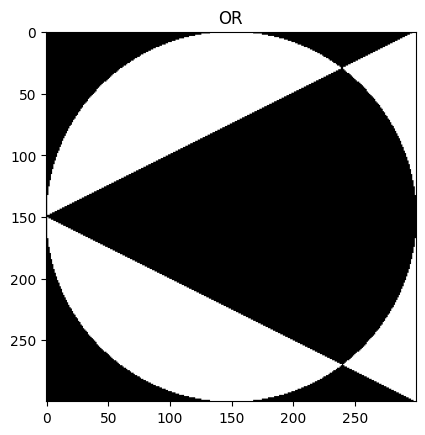

In [201]:
#XOR
img_xor = cv.bitwise_xor(circle,triangle)
plt_imshow("OR", img_xor)

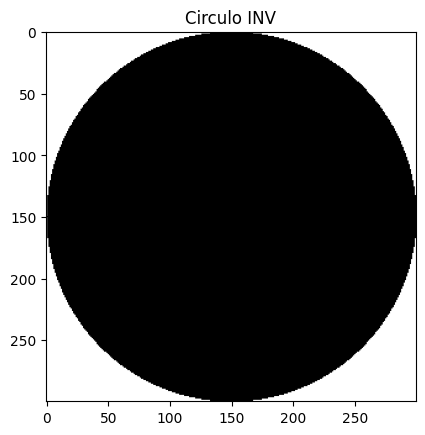

In [202]:
# inversa circle
circle_inv = cv.bitwise_not(circle)
plt_imshow("Circulo INV", circle_inv)

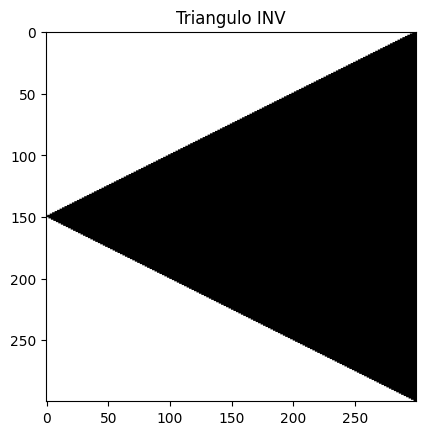

In [203]:
# inversa triangle
triangle_inv = cv.bitwise_not(triangle)
plt_imshow("Triangulo INV", triangle_inv)

<div class="alert alert-success">
    
**Ejercicio 2.  Descargar una imagen con el rostro de una persona**
    
   
 <ul>
  <li>a) Generar y aplicar una mascara con una circunferencia </li>
  <li>b) Generar y aplicar una mascara con un cuadrado</li>
</ul> 

</div>


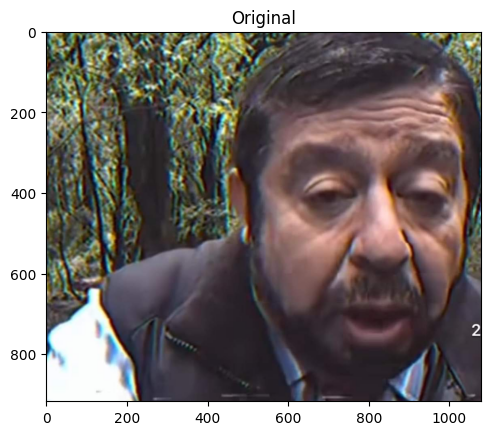

(917, 1080, 3)

In [204]:
face = cv.imread("figuras/rostro.jpg")
plt_imshow("Original",face)
face.shape

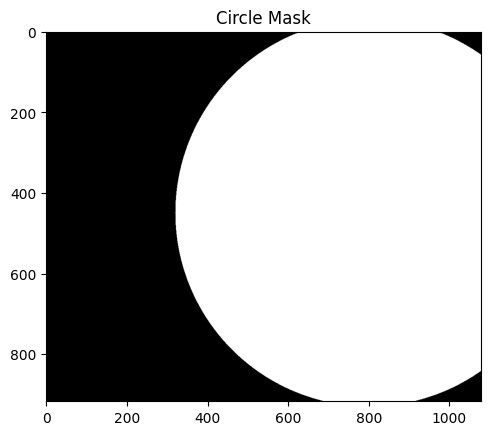

In [205]:
# Mascara circular y su implementación
masc_circle=np.zeros((face.shape[:2]), dtype="uint8")
cv.circle(masc_circle, (800, 450), 480, 255, -1)
plt_imshow("Circle Mask", masc_circle)

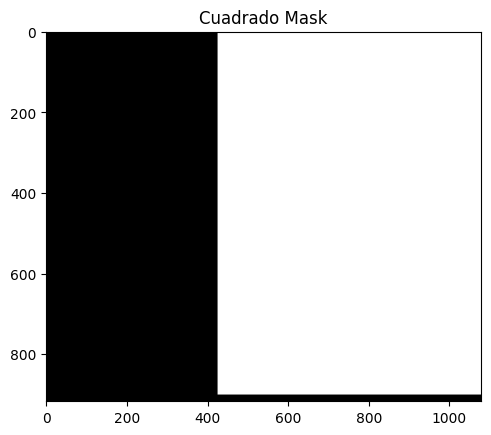

In [206]:
# Mascara cuadrado
square_masc=np.zeros((face.shape[:2]), dtype="uint8")
cv.rectangle(square_masc, (1080,900), (425, 0), 255, -1)
plt_imshow("Cuadrado Mask", square_masc)

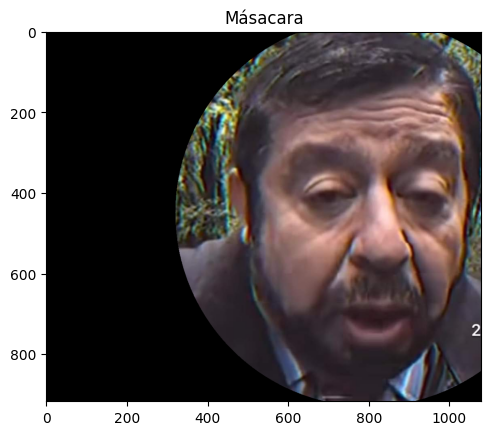

In [207]:
#Aplicar la mascara rectangular

img_mascara_circular = cv.bitwise_and(face, face, mask=masc_circle )

plt_imshow("Másacara", img_mascara_circular)

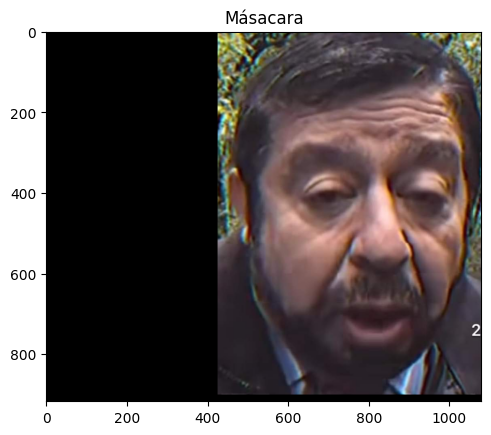

In [208]:
#Aplicar la mascara cuadrada

img_mascara_cuadrada = cv.bitwise_and(face, face, mask= square_masc)

plt_imshow("Másacara", img_mascara_cuadrada)

<div class="alert alert-success">
    
**Ejercicio 3**
    
   
 <ul>
  <li>a) Utilizando el archivo "figuras/letras.png.", aplicar todas las operaciones posibles para tratar de limpiar las letras de la figura del ruido existente </li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/letras.png">

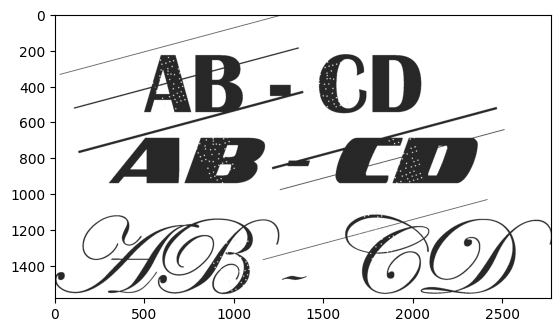

(1583, 2771)

In [209]:
img=cv.imread('figuras/letras.png')
img_word_gray = cv.cvtColor( img, cv.COLOR_BGR2GRAY)
plt.imshow(img_word_gray, cmap='gray')
plt.show()
img_word_gray.shape

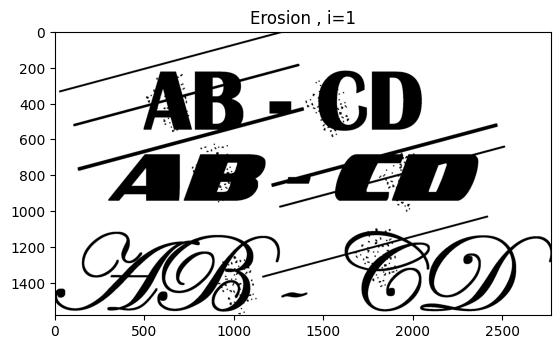

In [210]:
erosion = cv.erode(  img_word_gray.copy(), None, iterations = 3)
plt_imshow('Erosion , i=1', erosion)

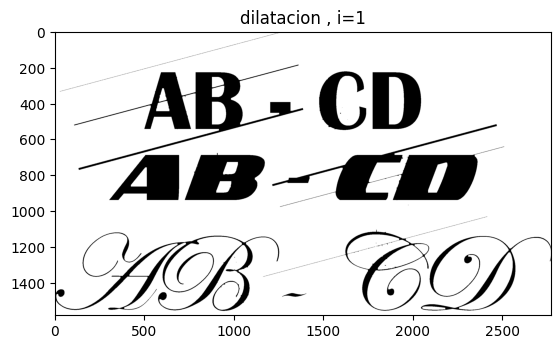

In [211]:
#Dilatación
dilatacion = cv.dilate(  erosion.copy(), None, iterations = 4)
plt_imshow('dilatacion , i=1', dilatacion)

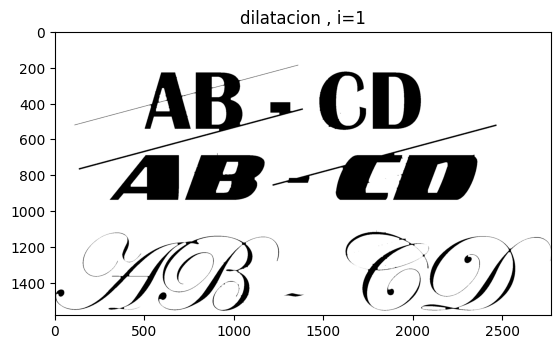

In [212]:
#Dilatación
dilatacion = cv.dilate(dilatacion.copy(), None, iterations = 1  )
plt_imshow('dilatacion , i=1', dilatacion)

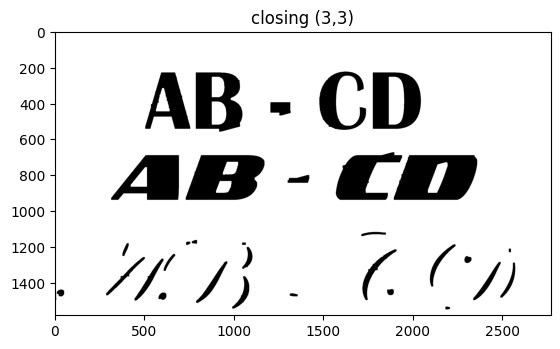

In [213]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (11,11))
closing = cv.morphologyEx( dilatacion.copy(), cv.MORPH_CLOSE, kernel)
plt_imshow('closing (3,3)',closing)

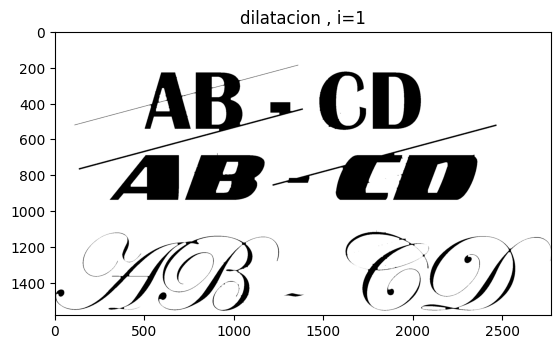

In [214]:
dilatacion = cv.dilate(dilatacion.copy(), None, iterations = 0 )
plt_imshow('dilatacion , i=1', dilatacion)

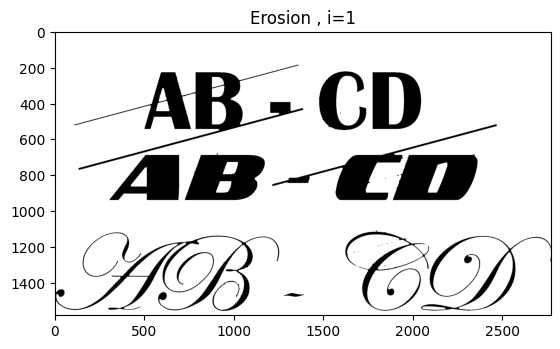

In [215]:
erosion = cv.erode( dilatacion.copy(), None, iterations = 1)
plt_imshow('Erosion , i=1', erosion)

<div class="alert alert-success">
    
**Ejercicio 4**
    
   
 <ul>
  <li> Utilizar una imagen que tenga algún objeto en color azul y obtenga una nueva imagen en donde todo lo azul este a color y el resto en escala de grises   </li>
</ul> 

</div>


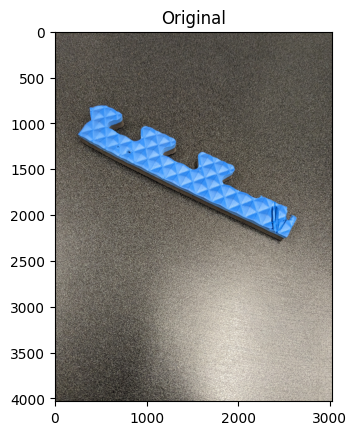

In [216]:
img_azul=cv.imread('figuras/algoazul.jpg')
plt_imshow("Original",img_azul)

In [217]:
#Llevamos a cabo el cambio de espacio de color y definimos los rangos 
img_hsv = cv.cvtColor(img_azul, cv.COLOR_BGR2HSV)
low = np.array([86,34,21])
high = np.array([164,255,255])

In [218]:
#Aplicamos la mascara de la region de color
masc_azul = cv.inRange(img_hsv,low,high)

In [219]:
# Revisamos los valores de los pixeles
masc_azul.shape

(4032, 3024)

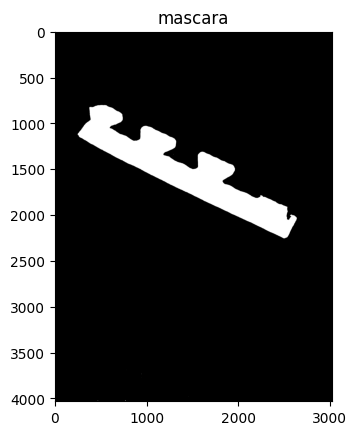

In [220]:
# Visualizamos la mascara
plt_imshow("mascara",masc_azul)

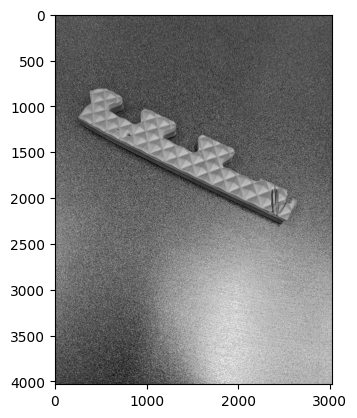

In [221]:
img_GRAY = cv.cvtColor( img_flor, cv.COLOR_BGR2GRAY)
plt.imshow(img_GRAY, cmap='gray')
plt.show()

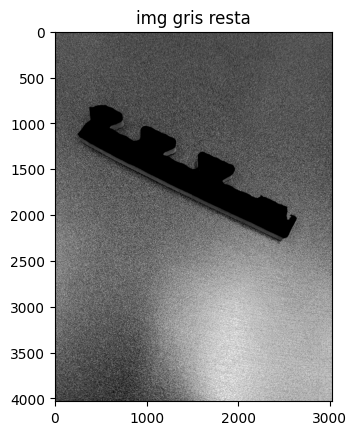

(4032, 3024)

In [222]:
#Obtenemos la imagen en escala de grisis y eliminamos los valores de la mascara
img_GRAY = cv.cvtColor( img_azul, cv.COLOR_BGR2GRAY)
img_GRAY_resta=cv.subtract( img_GRAY, masc_flor)
plt_imshow('img gris resta', img_GRAY_resta )
img_GRAY.shape

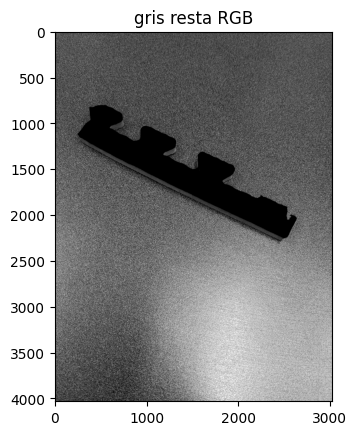

(4032, 3024, 3)

In [223]:
#COnvertimos la imagen resultante en RGB
img_GRAY_resta_rgb=cv.cvtColor(img_GRAY_resta,
                               cv.COLOR_GRAY2RGB)
plt_imshow('gris resta RGB', img_GRAY_resta_rgb )
img_GRAY_resta_rgb.shape

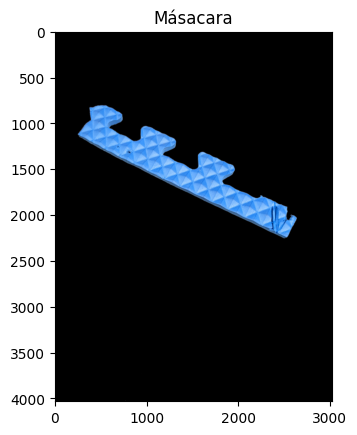

In [224]:
#Obtenemos la mascara aplicada a la imagen real
img_ = cv.bitwise_and(img_azul, img_flor, mask=masc_flor )
plt_imshow("Másacara", img_)

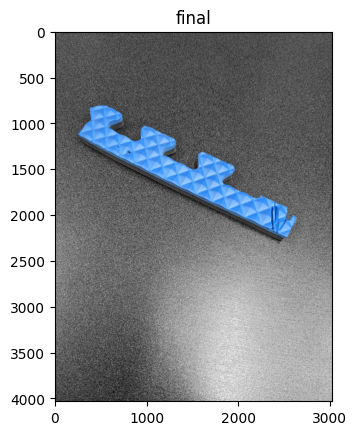

In [225]:
#Resaltando un color en una imagen  
img_final = cv.add(img_GRAY_resta_rgb, img_)
plt_imshow("final",img_final)